In [2]:
import os, sys

In [3]:
sys.getdefaultencoding()

'utf-8'

In [12]:
import pandas as pd
import json

# 店舗データ
with open('data/Yelp/business.json', encoding='utf-8') as biz_file:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])

In [14]:
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 対数

分布に偏りがあるときに有効

Text(0,0.5,'Occurrence')

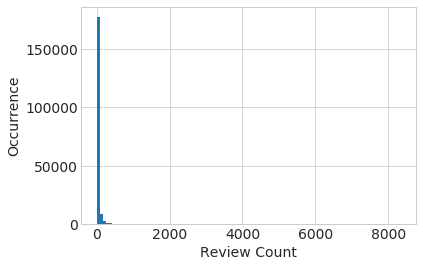

In [17]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

偏りがあるので「対数グラフ」として表示

Text(0,0.5,'Occurrence')

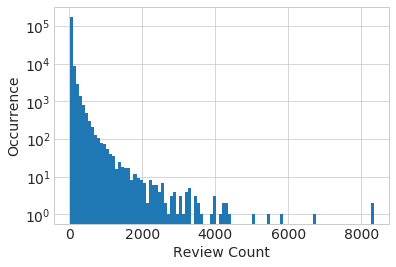

In [18]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log') # log scale
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

データ自体に対数変換をかける

Text(0,0.5,'Occurence')

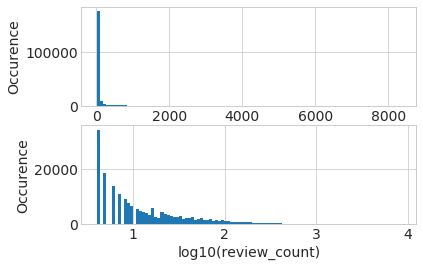

In [34]:
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1) # マイナス無限大を防ぐ

fig, (ax1, ax2) = plt.subplots(2, 1)

biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurence', fontsize=14)

biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count)', fontsize=14)
ax2.set_ylabel('Occurence', fontsize=14)

In [35]:
onp_df = pd.read_csv('data/OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ', engine='python')
onp_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [36]:
# ニュース記事に含まれる単語数を桁数ベースの対数変換する
onp_df['log_n_tokens_content'] = np.log10(onp_df['n_tokens_content'] + 1)
onp_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


Text(0,0.5,'Number of Articles')

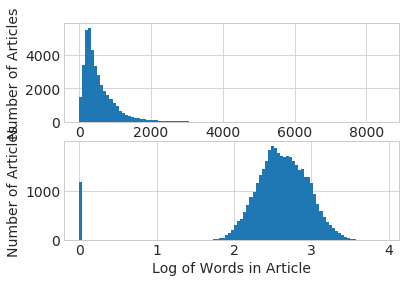

In [37]:
sns.set_style('whitegrid')

fig, (ax1, ax2) = plt.subplots(2, 1)

onp_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

onp_df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

## 予測モデルへの活用

In [38]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

各店舗の平均評価（Stars）を予測するために線形回帰モデルを学習する  
特徴量 review_count を対数変換した場合としない場合とで10分割クロスバリデーションにより R2 スコアを比較する

LinearRegressionは決定係数を出力する

In [45]:
m_orig = linear_model.LinearRegression()
score_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)

m_log = linear_model.LinearRegression()
score_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)

print('R-squared score without log transform: %0.5f (+/- %0.5f)' % (score_orig.mean(), score_orig.std() * 2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)' % (score_log.mean(), score_log.std() * 2))

R-squared score without log transform: 0.00160 (+/- 0.00090)
R-squared score with log transform: 0.00408 (+/- 0.00147)


対数をとったほうがむしろ決定係数が小さくなってしまっている．

原因を探るために特徴量とターゲット変数の分布を見てみる．

Text(0,0.5,'Average Star Rating')

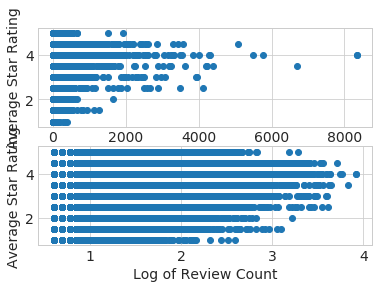

In [43]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

確かに元データのほうが線形回帰モデルにどちらかというと沿っている

ニュース記事の人気（shares）を予測するために線形回帰モデルを学習する  
特徴量 n_tokens_content（単語数） を対数変換した場合としない場合とで10分割クロスバリデーションにより R2 スコアを比較する

In [46]:
m_orig = linear_model.LinearRegression()
score_orig = cross_val_score(m_orig, onp_df[['n_tokens_content']], onp_df['shares'])

m_log = linear_model.LinearRegression()
score_log = cross_val_score(m_log, onp_df[['log_n_tokens_content']], onp_df['shares'])

print('R-squared score without log transform: %0.5f (+/- %0.5f)' % (score_orig.mean(), score_orig.std() * 2))
print('R-squared score with log transform: %0.5f (+/- %0.5f)' % (score_log.mean(), score_log.std() * 2))

R-squared score without log transform: -0.00460 (+/- 0.00747)
R-squared score with log transform: -0.00416 (+/- 0.00536)


今度は対数変換をしたほうが上回った（95%信頼区間（平均+/-標準誤差*1.96）には被っているので有意差があるとは言えない）  
ただし決定係数は適当なモデルでも0であり，マイナスなのでモデルとしてはあまり成立はしていない．

原因を探るために特徴量とターゲット変数の分布を見てみる．

Text(0,0.5,'Number of Shares')

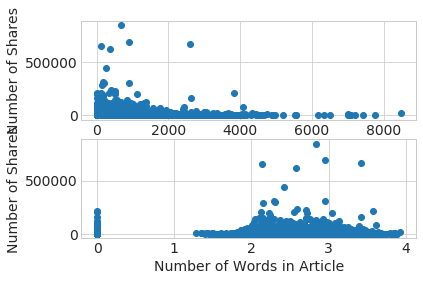

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.scatter(onp_df['n_tokens_content'], onp_df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(onp_df['log_n_tokens_content'], onp_df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

たしかに対数変換することによって０付近のものが右側に引き伸ばされ，どちらかというと線形回帰に沿いやすくなってそう．

# Box-Cox変換

対数変換と平方根変換の一般化として有名．

$$
{y^{(\lambda)} = \left\{
\begin{array}{ll}
\frac{x^{\lambda} - 1}{\lambda} & ( \lambda \neq 0)\\
\ln(x) & (\lambda = 0 )
\end{array}
\right.
}
$$

lambda = 0で対数変換  
lambda < 1で対数変換のように大きな値を縮小する  
lambda = 1はただの線形
lambda > 1は大きな値を拡大する

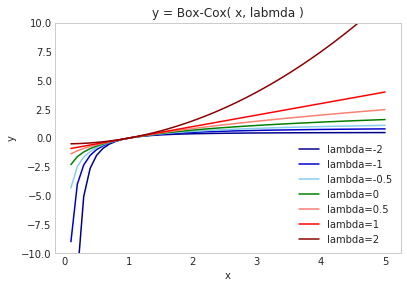

In [51]:
from scipy import stats

df_trans = pd.DataFrame({'x':np.arange(0.1, 5.1, 0.1)})

list_lambda = [-2, -1, -0.5, 0, 0.5, 1, 2]
for i, i_lambda in enumerate(list_lambda):
    df_trans[ 'y'+str(i) ] = stats.boxcox( df_trans.x, lmbda = i_lambda )

fig, ax = plt.subplots()
ax.plot(df_trans.x, df_trans.y0, color='darkblue',  label="lambda="+str(list_lambda[0]))
ax.plot(df_trans.x, df_trans.y1, color='mediumblue',label="lambda="+str(list_lambda[1]))
ax.plot(df_trans.x, df_trans.y2, color='skyblue',   label="lambda="+str(list_lambda[2]))
ax.plot(df_trans.x, df_trans.y3, color='green',label="lambda="+str(list_lambda[3]))
ax.plot(df_trans.x, df_trans.y4, color='salmon',    label="lambda="+str(list_lambda[4]))
ax.plot(df_trans.x, df_trans.y5, color='red',       label="lambda="+str(list_lambda[5]))
ax.plot(df_trans.x, df_trans.y6, color='darkred',   label="lambda="+str(list_lambda[6]))
ax.legend()
ax.set_title('y = Box-Cox( x, labmda )')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.ylim(-10, 10)
plt.grid()
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.1, top=0.9)
plt.show()

Box-Cox変換は，変換元データが正であることが条件．（負の場合は変換する）  
lambdaは自分で決めるのではなく変換後の分布がより正規分布に従うように決める．よく使われるのは最尤法である．

In [52]:
# 元データがマイナスをとらないかチェック
biz_df['review_count'].min()

3

In [54]:
# lambda=0は対数変換
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)

# lambdaを指定しなければライブラリ内部で変換後が最も正規分布に従うようにlambdaが決定される
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
bc_params

-0.37107910850437914

returnは変換後のデータとlambda

Text(0,0.5,'Occurrence')

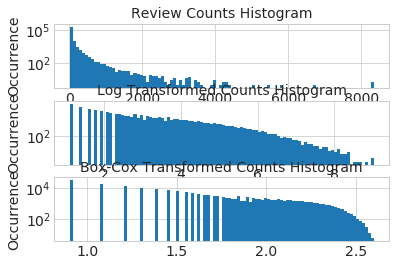

In [56]:
biz_df['rc_log'] = rc_log
biz_df['rc_bc'] = rc_bc

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
# レビュー件数のヒストグラム
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 対数変換後のレビュー件数のヒストグラム
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# 最適な Box-Cox 変換後のレビュー件数のヒストグラム
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

たしかにbox-Cox変換後が最も正規分布に近い

## 確率プロット

この「正規分布に近いか？」の判断には確率プロットを使う

Text(0.5,1,'Probplot after Box-Cox transform')

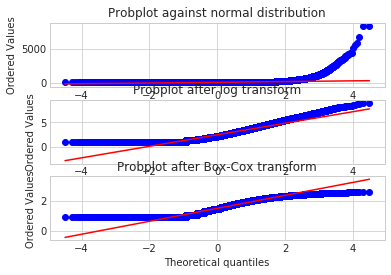

In [57]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1)

prob1 = stats.probplot(biz_df['review_count'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

簡単には直線に近いほど正規分布にしたがっている

# 離散化

## 固定幅

In [19]:
import numpy as np

np.random.seed(seed=1)

# 0から99までの整数を一様分布からランダムに生成する．
small_counts = np.random.randint(0, 100, 20)

In [20]:
small_counts

array([37, 12, 72,  9, 75,  5, 79, 64, 16,  1, 76, 71,  6, 25, 50, 20, 18,
       84, 11, 28])

0~99を10の倍数で離散化する

In [21]:
# 10で割って切り捨て
np.floor_divide(small_counts, 10)

array([3, 1, 7, 0, 7, 0, 7, 6, 1, 0, 7, 7, 0, 2, 5, 2, 1, 8, 1, 2])

複数桁を桁数で離散化する

In [22]:
# 複数桁カウントデータ
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 
                44, 28, 7971, 926, 122, 22222]

# 対数変換による指数幅の階級
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

## 分位数(quantile)

分位数とは区切られた各領域に含まれるデータの個数（量）が等しくなるということ

quantile

In [25]:
declies = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
declies

0.1     3.0
0.2     4.0
0.3     5.0
0.4     7.0
0.5     9.0
0.6    13.0
0.7    19.0
0.8    33.0
0.9    70.0
Name: review_count, dtype: float64

Text(0,0.5,'Ocuurrence')

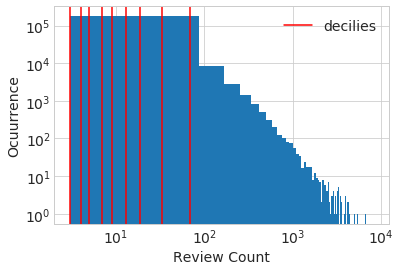

In [31]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in declies:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['decilies'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Ocuurrence', fontsize=14)

qcut

In [32]:
pd.qcut(large_counts, 4)

[(122.0, 926.0], (926.0, 8286.0], (8286.0, 91897.0], (2.999, 122.0], (2.999, 122.0], ..., (2.999, 122.0], (926.0, 8286.0], (122.0, 926.0], (2.999, 122.0], (8286.0, 91897.0]]
Length: 17
Categories (4, interval[float64]): [(2.999, 122.0] < (122.0, 926.0] < (926.0, 8286.0] < (8286.0, 91897.0]]

In [33]:
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

# スケーリング

予め値の範囲が決まっている特徴量であれば良いがカウントなどは上限がない．  
線形回帰やロジスティク回帰のようにモデルの入力がスケーリングに敏感な場合はスケーリングが役立つ．  
対数変換とは異なり，スケーリングによって特徴量の分布は変化しない．

In [60]:
import sklearn.preprocessing as preproc

In [58]:
onp_df['n_tokens_content'].values

array([219., 255., 211., ..., 442., 682., 157.])

## Min-Max  (正規化)

0~1に収める

In [62]:
onp_df['minmax'] = preproc.minmax_scale(onp_df[['n_tokens_content']])
onp_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

## 標準化(分散スケーリング)

平均０，分散１

In [64]:
onp_df['standardized'] = preproc.StandardScaler().fit_transform(onp_df[['n_tokens_content']])
onp_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

Min-Maxスケーリングや標準化は元データから一定の値を引くため，スパースデータを密データに変えてしまうことがあることに注意．

## L2正規化

L2ノルム（ユークリッドノルム）で割る (変換後の各特徴量を2乗して和をとると１になる)

In [68]:
onp_df['l2_normalized'] = preproc.normalize(onp_df[['n_tokens_content']], axis=0)
onp_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

In [71]:
sum(onp_df['l2_normalized']**2)

1.0000000000000158

## 変換前後のヒストグラム

Text(30.625,0.5,'Number of articles')

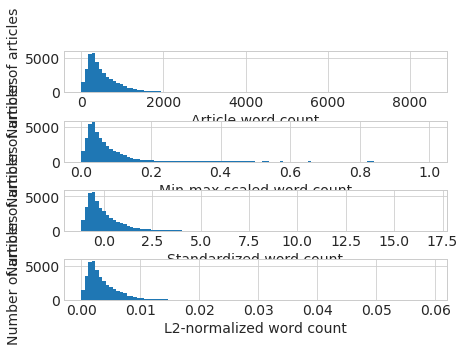

In [72]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.tight_layout()
onp_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

onp_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

onp_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

onp_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

# 交互作用特徴量

In [73]:
onp_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

sharesに関係ありそうな特徴量を取り出し，ペアワイズ交互作用特徴量を作成

簡単に言えば，x1, x2とあったときにx1x2を作るということ  
二値特徴量の場合は論理積となる  
通常計算量はn→n^2となる

In [74]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
            'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
            'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
            'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment',
            'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
            'data_channel_is_world']

X = onp_df[features]
y = onp_df['shares']

# 定数項(bias)は含めない
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [78]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [79]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [80]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113273351


組み合わせ特徴量のほうが精度がよくなっている